In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# === Configurations ===
grooming_column = "Grooming_bouts_avg"  # Options: "Grooming_time_avg" or "Grooming_bouts_avg"
fiber_column = "AUC_avg"               # Options: "AUC_avg" or "Peaks_avg"

# === File Paths ===
excel_path = r"E:\Weizmann Institute Dropbox\Uri Monsonego\Lab\Conferences\Amygdala Function in Emotion, Cognition and Disease\Grooming_Photometry_Data.xlsx"

In [5]:
# === Load Data ===
df_wt = pd.read_excel(excel_path, sheet_name="WT")
df_ko = pd.read_excel(excel_path, sheet_name="KO")
phases_wt = df_wt["EPA Phases"]
phases_ko = df_ko["EPA Phases"]

In [6]:
# === Compute Shared Y-axis Limits ===
groom_max = max(df_wt[grooming_column].max(), df_ko[grooming_column].max())
fiber_max = max(df_wt[fiber_column].max(), df_ko[fiber_column].max())

# Optional: add buffer
groom_ylim = (0, groom_max * 1.1)
fiber_ylim = (0, fiber_max * 1.1)

In [7]:
# def plot_dual_axis(phases, grooming_data, grooming_sem, fiber_data, fiber_sem,
#                    group_name, grooming_label, fiber_label, groom_ylim, fiber_ylim):
#     fig, ax1 = plt.subplots(figsize=(10, 6))
#     ax1.set_xlabel("EPA Phase")
#     ax1.set_ylabel(grooming_label)
#     ax1.errorbar(phases, grooming_data, yerr=grooming_sem, fmt='o-', color="blue" if group_name == "WT" else "red",
#                  label=f"{group_name} Grooming")
#     ax1.set_ylim(*groom_ylim)
#     ax1.tick_params(axis='y')

#     ax2 = ax1.twinx()
#     ax2.set_ylabel(fiber_label)
#     ax2.errorbar(phases, fiber_data, yerr=fiber_sem, fmt='s-', color="green", label=f"{group_name} {fiber_label}")
#     ax2.set_ylim(*fiber_ylim)
#     ax2.tick_params(axis='y')

#     lines1, labels1 = ax1.get_legend_handles_labels()
#     lines2, labels2 = ax2.get_legend_handles_labels()
#     ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

#     plt.title(f"{group_name}: {grooming_label} vs {fiber_label}")
#     for label in ax1.get_xticklabels():
#         label.set_rotation(45)
#         label.set_horizontalalignment('right')
#     plt.tight_layout()
#     plt.show()

In [8]:
def plot_dual_axis(phases, grooming_data, grooming_sem, fiber_data, fiber_sem,
                   group_name, grooming_label, fiber_label, groom_ylim, fiber_ylim):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # numeric x for fill_between
    x = np.arange(len(phases))

    # choose colors
    groom_color = "blue" if group_name == "WT" else "red"
    fiber_color = "green"

    # Grooming line + ribbon
    ax1.plot(x, grooming_data, '-', color=groom_color,
             linewidth=3, label=f"{group_name} Grooming")
    ax1.fill_between(x,
                     grooming_data - grooming_sem,
                     grooming_data + grooming_sem,
                     color=groom_color, alpha=0.2)
    ax1.set_ylabel(grooming_label)
    ax1.set_ylim(*groom_ylim)

    # Fiber line + ribbon on twin axis
    ax2 = ax1.twinx()
    ax2.plot(x, fiber_data, '-', color=fiber_color,
             linewidth=3, label=f"{group_name} {fiber_label}")
    ax2.fill_between(x,
                     fiber_data - fiber_sem,
                     fiber_data + fiber_sem,
                     color=fiber_color, alpha=0.2)
    ax2.set_ylabel(fiber_label)
    ax2.set_ylim(*fiber_ylim)

    # X‐axis
    ax1.set_xticks(x)
    ax1.set_xticklabels(phases, rotation=45, ha='right')
    ax1.set_xlabel("EPA Phase")

    # Legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper right')

    plt.title(f"{group_name}: {grooming_label} vs {fiber_label}")
    plt.tight_layout()
    plt.show()


In [9]:
# === Compute SEM ===
n_wt = 5
n_ko = 7

grooming_sem_wt = df_wt[grooming_column.replace("avg", "sd")] / np.sqrt(n_wt)
grooming_sem_ko = df_ko[grooming_column.replace("avg", "sd")] / np.sqrt(n_ko)
fiber_sem_wt = df_wt[fiber_column.replace("avg", "sd")] / np.sqrt(n_wt)
fiber_sem_ko = df_ko[fiber_column.replace("avg", "sd")] / np.sqrt(n_ko)

# === Updated Y-axis limits to include SEM ===
groom_max = max((df_wt[grooming_column] + grooming_sem_wt).max(),
                (df_ko[grooming_column] + grooming_sem_ko).max())
fiber_max = max((df_wt[fiber_column] + fiber_sem_wt).max(),
                (df_ko[fiber_column] + fiber_sem_ko).max())

groom_ylim = (0, groom_max * 1.1)
fiber_ylim = (0, fiber_max * 1.1)


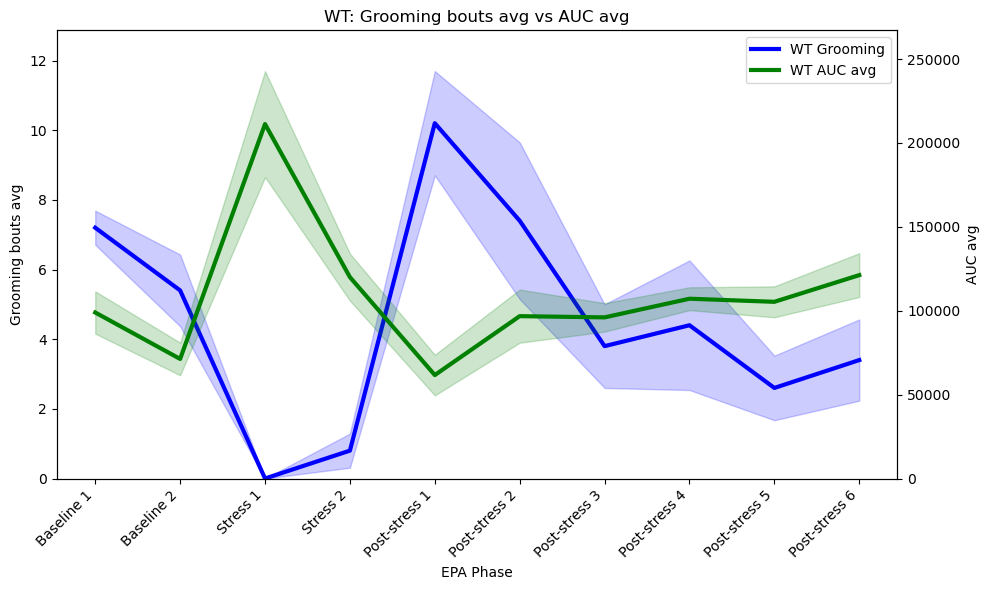

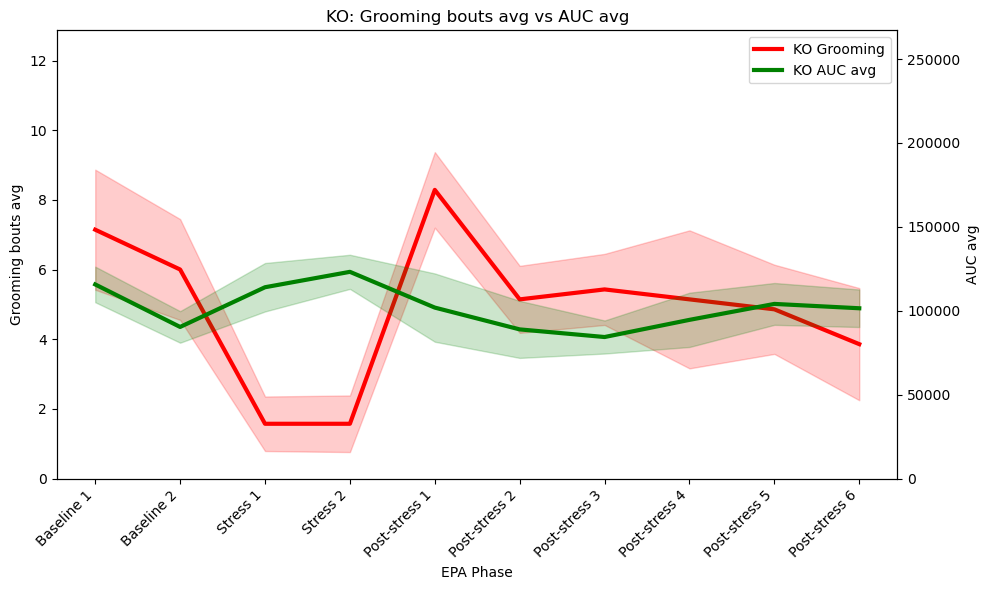

In [10]:
# === Plot WT ===
plot_dual_axis(
    phases_wt, df_wt[grooming_column], grooming_sem_wt,
    df_wt[fiber_column], fiber_sem_wt,
    group_name="WT", grooming_label=grooming_column.replace("_", " "),
    fiber_label=fiber_column.replace("_", " "),
    groom_ylim=groom_ylim, fiber_ylim=fiber_ylim
)

# === Plot KO ===
plot_dual_axis(
    phases_ko, df_ko[grooming_column], grooming_sem_ko,
    df_ko[fiber_column], fiber_sem_ko,
    group_name="KO", grooming_label=grooming_column.replace("_", " "),
    fiber_label=fiber_column.replace("_", " "),
    groom_ylim=groom_ylim, fiber_ylim=fiber_ylim
)

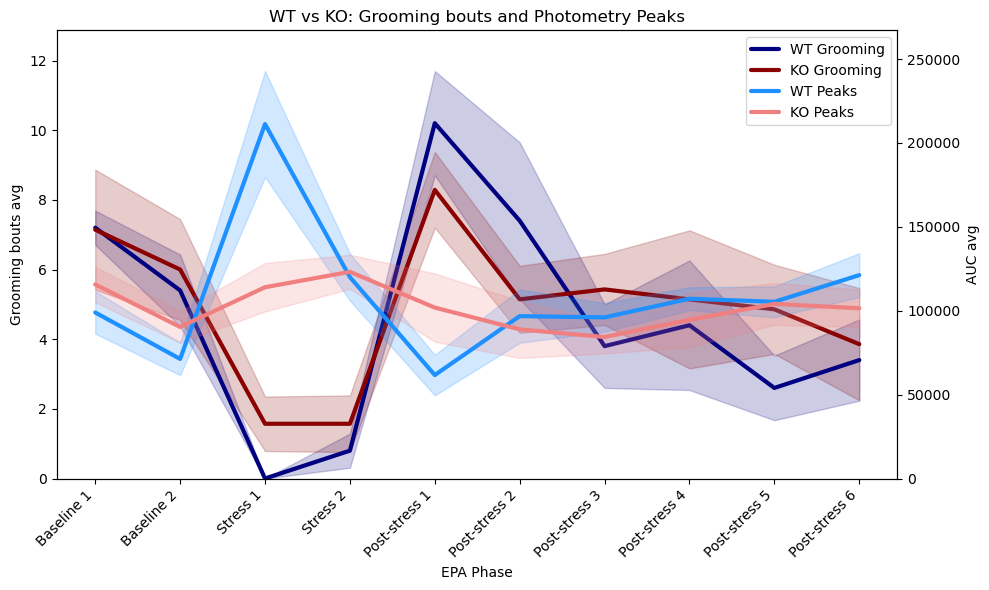

In [11]:
# === Combined WT + KO plot (rounded corners + new blue) ===
fig, ax1 = plt.subplots(figsize=(10, 6))
x = np.arange(len(phases_wt))

# ---- Grooming on left y-axis ----
# WT Grooming (dark blue)
ln1 = ax1.plot(
    x, df_wt[grooming_column], '-',
    color='navy',
    linewidth=3,
    solid_joinstyle='round', solid_capstyle='round',
    label='WT Grooming'
)
poly1 = ax1.fill_between(
    x,
    df_wt[grooming_column] - grooming_sem_wt,
    df_wt[grooming_column] + grooming_sem_wt,
    color='navy', alpha=0.2
)
poly1.set_joinstyle('round')

# KO Grooming (dark red)
ln2 = ax1.plot(
    x, df_ko[grooming_column], '-',
    color='darkred',
    linewidth=3,
    solid_joinstyle='round', solid_capstyle='round',
    label='KO Grooming'
)
poly2 = ax1.fill_between(
    x,
    df_ko[grooming_column] - grooming_sem_ko,
    df_ko[grooming_column] + grooming_sem_ko,
    color='darkred', alpha=0.2
)
poly2.set_joinstyle('round')

ax1.set_xlabel("EPA Phase")
ax1.set_ylabel(grooming_column.replace("_", " "))
ax1.set_xticks(x)
ax1.set_xticklabels(phases_wt, rotation=45, ha='right')
ax1.set_ylim(*groom_ylim)

# ---- Peaks on right y-axis ----
ax2 = ax1.twinx()

# WT Peaks (dodgerblue)
ln3 = ax2.plot(
    x, df_wt[fiber_column], '-',
    color='dodgerblue',
    linewidth=3,
    solid_joinstyle='round', solid_capstyle='round',
    label='WT Peaks'
)
poly3 = ax2.fill_between(
    x,
    df_wt[fiber_column] - fiber_sem_wt,
    df_wt[fiber_column] + fiber_sem_wt,
    color='dodgerblue', alpha=0.2
)
poly3.set_joinstyle('round')

# KO Peaks (light red)
ln4 = ax2.plot(
    x, df_ko[fiber_column], '-',
    color='lightcoral',
    linewidth=3,
    solid_joinstyle='round', solid_capstyle='round',
    label='KO Peaks'
)
poly4 = ax2.fill_between(
    x,
    df_ko[fiber_column] - fiber_sem_ko,
    df_ko[fiber_column] + fiber_sem_ko,
    color='lightcoral', alpha=0.2
)
poly4.set_joinstyle('round')

ax2.set_ylabel(fiber_column.replace("_", " "))
ax2.set_ylim(*fiber_ylim)

# ---- Legend & Title ----
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title("WT vs KO: Grooming bouts and Photometry Peaks")
plt.tight_layout()
plt.show()


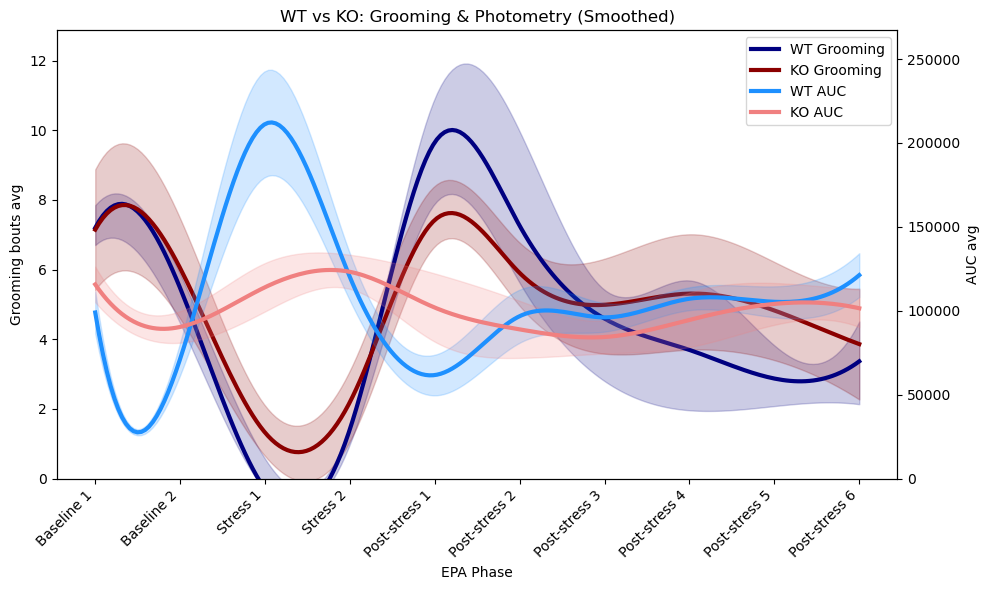

In [12]:
from scipy.interpolate import UnivariateSpline

# === Combined WT + KO with mild smoothing ===
fig, ax1 = plt.subplots(figsize=(10, 6))

# original x positions and dense grid
x = np.arange(len(phases_wt))
x_smooth = np.linspace(x.min(), x.max(), 200)

# choose smoothing strength (smaller → less aggressive)
s = 2

# -- WT Grooming (navy) --
spl = UnivariateSpline(x, df_wt[grooming_column], s=s)
y_wt = spl(x_smooth)
spl_lo = UnivariateSpline(x, df_wt[grooming_column] - grooming_sem_wt, s=s)
spl_hi = UnivariateSpline(x, df_wt[grooming_column] + grooming_sem_wt, s=s)
ax1.plot(x_smooth, y_wt, color='navy', linewidth=3, label='WT Grooming', solid_joinstyle='round')
ax1.fill_between(x_smooth, spl_lo(x_smooth), spl_hi(x_smooth), color='navy', alpha=0.2)

# -- KO Grooming (darkred) --
spl = UnivariateSpline(x, df_ko[grooming_column], s=s)
y_ko = spl(x_smooth)
spl_lo = UnivariateSpline(x, df_ko[grooming_column] - grooming_sem_ko, s=s)
spl_hi = UnivariateSpline(x, df_ko[grooming_column] + grooming_sem_ko, s=s)
ax1.plot(x_smooth, y_ko, color='darkred', linewidth=3, label='KO Grooming', solid_joinstyle='round')
ax1.fill_between(x_smooth, spl_lo(x_smooth), spl_hi(x_smooth), color='darkred', alpha=0.2)

ax1.set_xlabel("EPA Phase")
ax1.set_ylabel(grooming_column.replace("_", " "))
ax1.set_xticks(x)
ax1.set_xticklabels(phases_wt, rotation=45, ha='right')
ax1.set_ylim(*groom_ylim)

# -- Photometry on twin axis --
ax2 = ax1.twinx()

# WT Peaks (dodgerblue)
spl = UnivariateSpline(x, df_wt[fiber_column], s=s)
y_wt_p = spl(x_smooth)
spl_lo = UnivariateSpline(x, df_wt[fiber_column] - fiber_sem_wt, s=s)
spl_hi = UnivariateSpline(x, df_wt[fiber_column] + fiber_sem_wt, s=s)
ax2.plot(x_smooth, y_wt_p, color='dodgerblue', linewidth=3, label='WT AUC', solid_joinstyle='round')
ax2.fill_between(x_smooth, spl_lo(x_smooth), spl_hi(x_smooth), color='dodgerblue', alpha=0.2)

# KO Peaks (lightcoral)
spl = UnivariateSpline(x, df_ko[fiber_column], s=s)
y_ko_p = spl(x_smooth)
spl_lo = UnivariateSpline(x, df_ko[fiber_column] - fiber_sem_ko, s=s)
spl_hi = UnivariateSpline(x, df_ko[fiber_column] + fiber_sem_ko, s=s)
ax2.plot(x_smooth, y_ko_p, color='lightcoral', linewidth=3, label='KO AUC', solid_joinstyle='round')
ax2.fill_between(x_smooth, spl_lo(x_smooth), spl_hi(x_smooth), color='lightcoral', alpha=0.2)

ax2.set_ylabel(fiber_column.replace("_", " "))
ax2.set_ylim(*fiber_ylim)

# -- Legend & Title --
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title("WT vs KO: Grooming & Photometry (Smoothed)")
plt.tight_layout()
plt.show()


In [13]:
def plot_dual_axis_bars(phases, grooming_data, grooming_sem, fiber_data, fiber_sem,
                        group_name, grooming_label, fiber_label, groom_ylim, fiber_ylim):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    bar_width = 0.35
    x = np.arange(len(phases))

    ax1.set_xlabel("EPA Phase")
    ax1.set_ylabel(grooming_label)
    ax1.bar(x - bar_width/2, grooming_data, width=bar_width,
            yerr=grooming_sem, capsize=4,
            color="blue" if group_name == "WT" else "red", label=f"{group_name} Grooming")
    ax1.set_ylim(*groom_ylim)
    ax1.set_xticks(x)
    ax1.set_xticklabels(phases)
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()
    ax2.set_ylabel(fiber_label)
    ax2.bar(x + bar_width/2, fiber_data, width=bar_width,
            yerr=fiber_sem, capsize=4,
            color="green", label=f"{group_name} {fiber_label}")
    ax2.set_ylim(*fiber_ylim)
    ax2.tick_params(axis='y')

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    plt.title(f"{group_name}: {grooming_label} vs {fiber_label} (Bar Plot)")
    for label in ax1.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
    plt.tight_layout()
    plt.show()


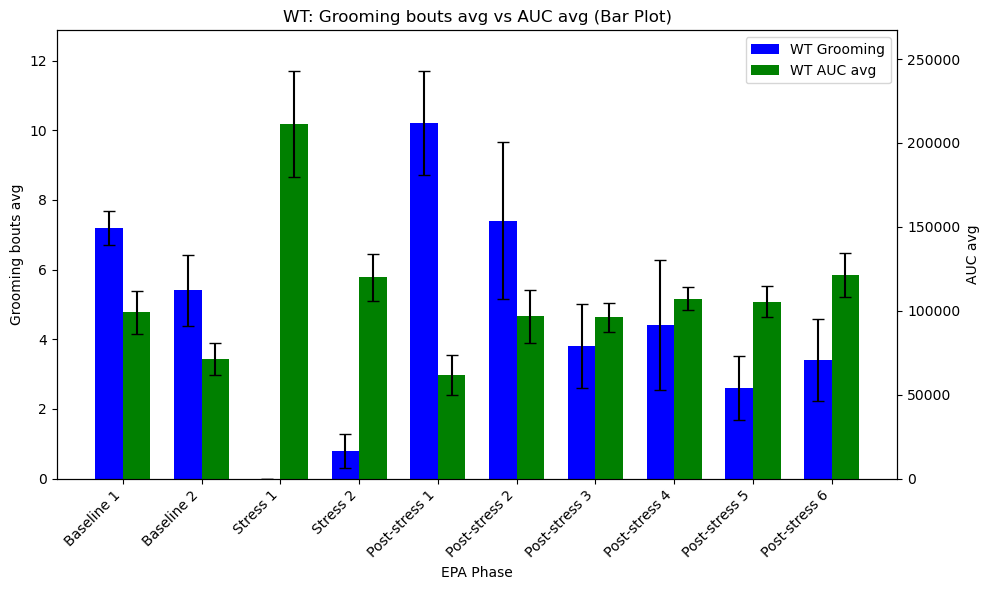

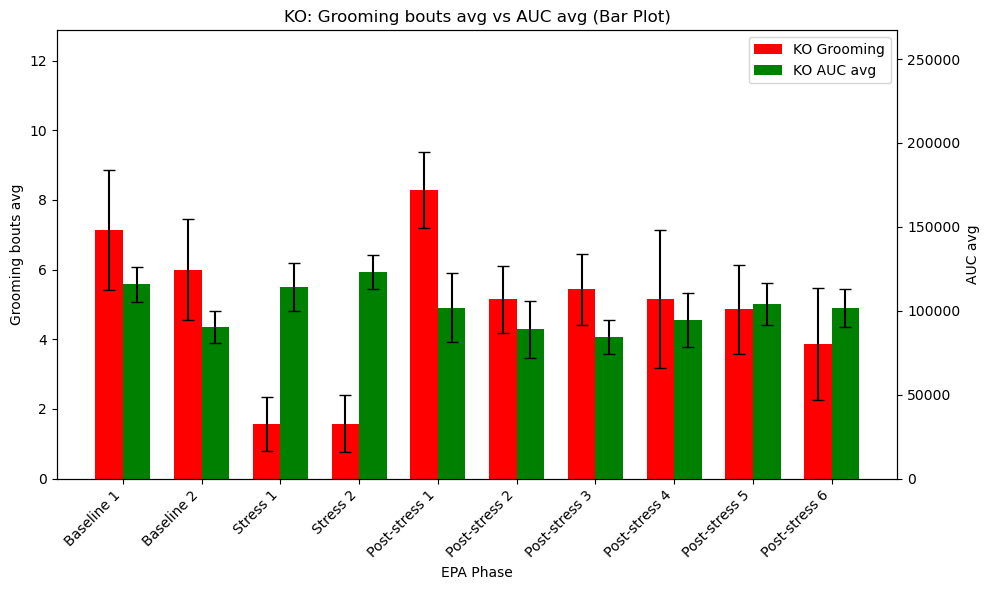

In [14]:
# WT as bar plot
plot_dual_axis_bars(
    phases_wt, df_wt[grooming_column], grooming_sem_wt,
    df_wt[fiber_column], fiber_sem_wt,
    group_name="WT", grooming_label=grooming_column.replace("_", " "),
    fiber_label=fiber_column.replace("_", " "),
    groom_ylim=groom_ylim, fiber_ylim=fiber_ylim
)

# KO as bar plot
plot_dual_axis_bars(
    phases_ko, df_ko[grooming_column], grooming_sem_ko,
    df_ko[fiber_column], fiber_sem_ko,
    group_name="KO", grooming_label=grooming_column.replace("_", " "),
    fiber_label=fiber_column.replace("_", " "),
    groom_ylim=groom_ylim, fiber_ylim=fiber_ylim
)
